# Well let's not make it so easy :p... Read everyline carefully... HAIL HYDRA!

### Often in programming, you are forced to find a relevant information to you in a HUGE codebase

#### It's so frustating... like the KMP String matching algorithm... luckily for you we've made it obvious... "You seek a Key hidden in the second cell below"... just find the string within quotes '' and then scroll down

##### Remember anytime you need our help... post a story on IG tagging @dsc_nit.agt and then DM us your query :)

In [14]:
import os
import sys
import random
import numpy as np
import pandas as pd
import cv2
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def detection(image):
    image_edges = _edges_detection(image, 200, 250)
    
    # Close gaps between edges (double page clouse => rectangle kernel)
    closed_edges = cv2.morphologyEx(image_edges, 
                                    cv2.MORPH_CLOSE, 
                                    np.ones((5, 11)))
    # Countours
    page_contour = _find_page_contours(closed_edges, resize(image))
    # Recalculate to original scale
    page_contour = page_contour.dot(ratio(image))    
    # Transform prespective
    new_image = _persp_transform(image, page_contour)
    return new_image
   

def _edges_detection(img, minVal, maxVal):
    """Preprocessing (gray, thresh, filter, border) + Canny edge detection."""
    img = cv2.cvtColor(resize(img), cv2.COLOR_BGR2GRAY)

    img = cv2.bilateralFilter(img, 9, 75, 75)
    img = cv2.adaptiveThreshold(img, 255,
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 115, 4)

    # Median blur replace center pixel by median of pixels under kelner
    # => removes thin details
    img = cv2.medianBlur(img, 11)

    # Add black border - detection of border touching pages
    img = cv2.copyMakeBorder(img, 5, 5, 5, 5,
                             cv2.BORDER_CONSTANT,
                             value=[0, 0, 0])
    return cv2.Canny(img, minVal, maxVal)


def _four_corners_sort(pts):
    """Sort corners in order: top-left, bot-left, bot-right, top-right."""
    diff = np.diff(pts, axis=1)
    summ = pts.sum(axis=1)
    return np.array([pts[np.argmin(summ)],
                     pts[np.argmax(diff)],
                     pts[np.argmax(summ)],
                     pts[np.argmin(diff)]])


def _contour_offset(cnt, offset):
    """Offset contour because of 5px border."""
    cnt += offset
    cnt[cnt < 0] = 0
    return cnt


def _find_page_contours(edges, img):
    """Finding corner points of page contour."""
    
    contours, hierarchy = cv2.findContours(edges,
                                                cv2.RETR_TREE,
                                                cv2.CHAIN_APPROX_SIMPLE)
    
    # Finding biggest rectangle otherwise return original corners
    height = edges.shape[0]
    width = edges.shape[1]
    MIN_COUNTOUR_AREA = height * width * 0.5
    MAX_COUNTOUR_AREA = (width - 10) * (height - 10)

    max_area = MIN_COUNTOUR_AREA
    page_contour = np.array([[0, 0],
                             [0, height-5],
                             [width-5, height-5],
                             [width-5, 0]])

    for cnt in contours:
        perimeter = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.03 * perimeter, True)

        # Page has 4 corners and it is convex
        if (len(approx) == 4 and
                cv2.isContourConvex(approx) and
                max_area < cv2.contourArea(approx) < MAX_COUNTOUR_AREA):
            
            max_area = cv2.contourArea(approx)
            page_contour = approx[:, 0]

    # Sort corners and offset them
    page_contour = _four_corners_sort(page_contour)
    return _contour_offset(page_contour, (-5, -5))


def _persp_transform(img, s_points):
    """Transform perspective from start points to target points."""
    # Euclidean distance - calculate maximum height and width
    height = max(np.linalg.norm(s_points[0] - s_points[1]),
                 np.linalg.norm(s_points[2] - s_points[3]))
    width = max(np.linalg.norm(s_points[1] - s_points[2]),
                 np.linalg.norm(s_points[3] - s_points[0]))
    
    # Create target points
    t_points = np.array([[0, 0],
                        [0, height],
                        [width, height],
                        [width, 0]], np.float32)
    
    # getPerspectiveTransform() needs float32
    if s_points.dtype != np.float32:
        s_points = s_points.astype(np.float32)
    
    M = cv2.getPerspectiveTransform(s_points, t_points) 
    return cv2.warpPerspective(img, M, (int(width), int(height)))

# you seek this
import base64
def dscChallenge():
    encoded_data = base64.b64encode(b"the_link_was_supposed to be here")

    print("YOUR KEY IS")
    print('aHR0cDovL2RzY25pdGEuZ2l0aHViLmlvL29sZEluZGV4Lmh0bWw=')
    print('ALERT: IT IS A BINARY STRING of python xD')



SMALL_HEIGHT = 800
def implt(img, cmp=None, t=''):
    
    plt.imshow(img, cmap=cmp)
    plt.title(t)
    plt.show()


def resize(img, height=SMALL_HEIGHT, allways=False):
    if (img.shape[0] > height or allways):
        rat = height / img.shape[0]
        return cv2.resize(img, (int(rat * img.shape[1]), height))
    
    return img


def ratio(img, height=SMALL_HEIGHT):
    return img.shape[0] / height


def img_extend(img, shape):
    x = np.zeros(shape, np.uint8)
    x[:img.shape[0], :img.shape[1]] = img
    return x


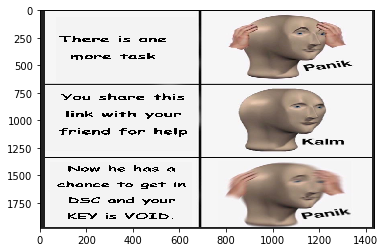

In [21]:
img = plt.imread("C://Users/Ayush Singh/Documents/meme.png")
plt.imshow(img,aspect='auto',cmap=None)

# READ THIS BEFORE PROCEDING

Congratulations! you've made it till here...

Now time to test your **Googling ability** :D

The code you received has been encoded using 'base64 python'... **IMPORTANT** It is **NOT** neccessary to know python3 for this challange.

Time for you to take help of StackOverflow... here are the steps... 

1. Find the code to 'decrypt a base64 string using python' on **StackOverflow**.

2. Google **COLAB NOTEBOOK PYTHON** , open it and  **Create a new notebook**  ....... File-->New Notebook.

3. In the colab notebook cell first type:  **import base64** and press **Shift+Enter**

4. Then paste your code, replace the example text with your challange key. Print the result and hit Shift+enter to execute the command. :)

In [3]:
print('Remember if you are stuck at any point... just post it on your Instagram story tagging @dsc_nit.agt')
print('and then DM us your query... we\'ll help you :)')

Remember if you are stuck at any point... just post it on your Instagram story tagging @dsc_nit.agt
and then DM us your query... we'll help you :)


# BEST OF LUCK